In [1]:
from IPython.display import SVG, display
import numpy as np
from matplotlib.colors import rgb2hex, Normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import svg 
from moebius import parameterized_moebius, moebius_circle, moebius
from make_colormap import make_colormap, plot_colormap


In [2]:
            
def reflect_circle(z1, z2, z3, z4, k1, k2, k3, k4):
    """ Reflects the circle with center z4 and radius k4 to the second solution of the Descartes circle theorem."""
 
    k = 2*(k1+k2+k3) - k4
    z = (2*(k1*z1 + k2*z2 + k3*z3) - k4*z4) / k
    
    return z, k

def gasket(z1,z2,z3,z4,k1,k2,k3,k4,level=0,maxlevel=1,k_max=800):
    """ Recursive function to generate the Apollonian gasket."""
       
    # At the first level, four circles are added,
    # while at the next levels only the unique reflected
    # circle from the recursion is added.
    
    # The recursion adds three circles.
    if level == 0:
        # Add the first four kissing circles
        gasket.x = []
        gasket.y = []
        gasket.r = []
        gasket.x.append(z1.real)
        gasket.x.append(z2.real)
        gasket.x.append(z3.real)
        gasket.x.append(z4.real)
        gasket.y.append(z1.imag)
        gasket.y.append(z2.imag)
        gasket.y.append(z3.imag)
        gasket.y.append(z4.imag)
        gasket.r.append(1/np.abs(k1))
        gasket.r.append(1/np.abs(k2))
        gasket.r.append(1/np.abs(k3))
        gasket.r.append(1/np.abs(k4))
        
                
    else:
        # add only the generated reflected circle
        gasket.x.append(z4.real)
        gasket.y.append(z4.imag)
        gasket.r.append(1/np.abs(k4))
        
    
    # Recursion.
    # Add 4 circles at level 0, and 3 circles at each level after that
    if level < maxlevel:
        if level == 0:
            z, k = reflect_circle(z1, z2, z3, z4, k1, k2, k3, k4)    
            gasket(z1, z2, z3, z, k1, k2, k3, k, level=level+1,maxlevel=maxlevel)
        
        z, k = reflect_circle(z1, z2, z4, z3, k1, k2, k4, k3)

        # Continue to next level only if the radius of the new circle is smaller than the minimum radius
        if k < k_max:  
            gasket(z1, z2, z4, z, k1, k2, k4, k, level=level+1,maxlevel=maxlevel)
        
        z, k = reflect_circle(z1, z4, z3, z2, k1, k4, k3, k2) 
           
        if k < k_max:
            gasket(z1, z4, z3, z, k1, k4, k3, k, level=level+1,maxlevel=maxlevel)
        
        z, k = reflect_circle(z4, z2, z3, z1, k4, k2, k3, k1)    
    
        if k < k_max:
            gasket(z4, z2, z3, z, k4, k2, k3, k, level=level+1,maxlevel=maxlevel)


In [3]:
# Seed circles
z1 = 0.0
z2 = -1.0
z3 = 1.0
z4 = 4j/3

k1 = -0.5
k2 = 1.0
k3 = 1.0
k4 = 1.5



# Transform to equilateral triangle:
# w4 = 1j*3**.5 + 0.2j

# The most general transformation needed is:
# - Choose w4.
# - Rotate w2, w3, w4 by an angle.
w2 = z2 
w3 = z3 
w4 =  2j
alpha = 0.0
w2 = w2 * np.exp(1j*alpha)
w3 = w3 * np.exp(1j*alpha)
w4 = w4 * np.exp(1j*alpha)



aa, bb, cc, dd = parameterized_moebius(z2, z3, z4, w2, w3, w4)
print(f'Moebius parameters: a = {aa}, b = {bb}, c = {cc}, d = {dd}')


# Transform initial circles
z1, r1 = moebius_circle(z1, np.abs(1/k1), aa, bb, cc, dd)
k1 = 1/r1 * np.sign(k1)
z2, r2 = moebius_circle(z2, np.abs(1/k2), aa, bb, cc, dd)
k2 = 1/r2 * np.sign(k2)
z3, r3 = moebius_circle(z3, np.abs(1/k3), aa, bb, cc, dd)
k3 = 1/r3 * np.sign(k3)
z4, r4 = moebius_circle(z4, np.abs(1/k4), aa, bb, cc, dd)
k4 = 1/r4 * np.sign(k4)






Moebius parameters: a = (-0.7333333333333334+0j), b = -0.13333333333333336j, c = -0.13333333333333336j, d = (-0.7333333333333334+0j)


In [4]:

# Generate the gasket
gasket(z1, z2, z3, z4, k1, k2, k3, k4, maxlevel=10)
x, y, r = np.array(gasket.x), np.array(gasket.y), np.array(gasket.r)
k = 1/r



In [5]:
# Choose color map
theme_colors = ['#B85042', '#E7E8D1', '#A7BEAE']
cmap = make_colormap(theme_colors)
#cmap = matplotlib.colormaps.get_cmap('viridis')


# Define coloring algorithm
def circle_colors(x, y, r):
    """ Color the circles based on the curvatures."""
    k = 1/r
    # find the next to minimal curvature
    # Normalize the curvatures
    y = k ** .5
    norm = Normalize(vmin=.5, vmax=10, clip=True)
    #print(norm(y))
    return  cmap(norm(y))
    

colors = circle_colors(x, y, r)

Viewing window:
-2.38095238095 2.38095238095 -1.33333333333 3.42857142857


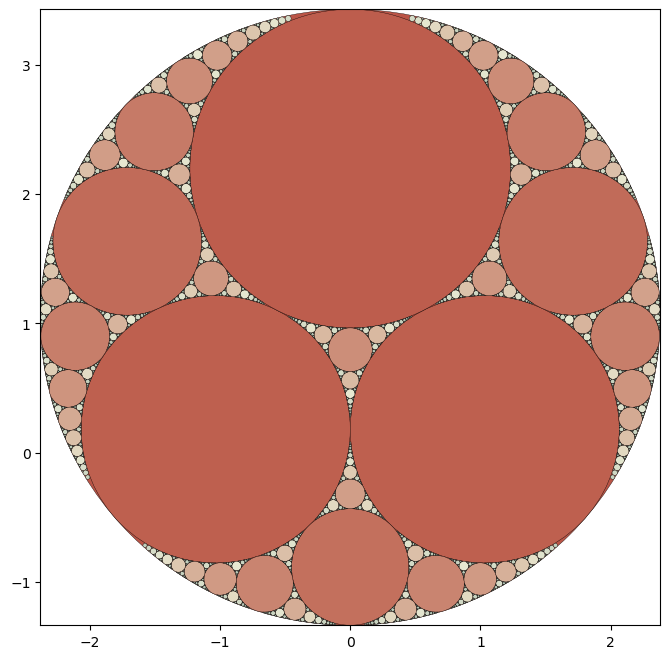

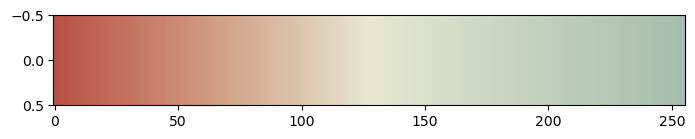

In [130]:

# set up viewing window to be a square
# that contains all the circles
x_min = np.min([x[i] - r[i] for i in range(len(x))])
x_max = np.max([x[i] + r[i] for i in range(len(x))])
y_min = np.min([y[i] - r[i] for i in range(len(y))])
y_max = np.max([y[i] + r[i] for i in range(len(y))])
dx = x_max - x_min
dy = y_max - y_min
if dx > dy:
    y_min -= (dx - dy)/2
    y_max += (dx - dy)/2
else:
    x_min -= (dy - dx)/2
    x_max += (dy - dx)/2

print('Viewing window:')    
print(x_min, x_max, y_min, y_max)

# Size of the figure
pix = 1000

def canvas_coords(x, y, r):
    """ Convert logical coordinates to canvas coordinates."""
    x = (np.array(x) - x_min) / (x_max - x_min) * pix
    y = pix - (np.array(y) - y_min) / (y_max - y_min) * pix
    r = np.array(r) / (x_max - x_min) * pix
    return x, y, r




# Make a preview using matplotlib
fig, ax = plt.subplots(figsize=(8,8))
for x1, y1, r1, color in zip(x, y, r, colors):
    #index0 = 0.0005 * k1**.5
    #color = cmap(255*index0)
    ax.add_artist(plt.Circle((x1, y1), r1, facecolor=color, fill=True, edgecolor='k', lw=0.25))

    fill_style = rgb2hex(color)
    stroke_style = rgb2hex((0,0,0))
    elements.append(svg.Circle(cx=x1, cy=y1, r=r1, fill=fill_style, stroke=stroke_style, stroke_width=.125/2))

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# make a plot of the colormap
plt.figure(figsize=(8, 1))
gradient = np.linspace(0, 1, 256)
plt.imshow([gradient], aspect='auto', cmap=cmap)
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.99)
plt.show()



In [131]:

# Convert logical coordinates to canvas coordinates
xx, yy, rr = canvas_coords(x, y, r)
#
# Generate SVG elements
elements = []
for x1,y1,r1,color in zip(xx, yy, rr, colors):
    #index0 = 0.0005 * k1**.5
    # color = cmap(255*index0)
    fill_style = rgb2hex(color)
    stroke_style = rgb2hex((0,0,0))
    elements.append(svg.Circle(cx=x1, cy=y1, r=r1, fill=fill_style, stroke=stroke_style, stroke_width=.125))



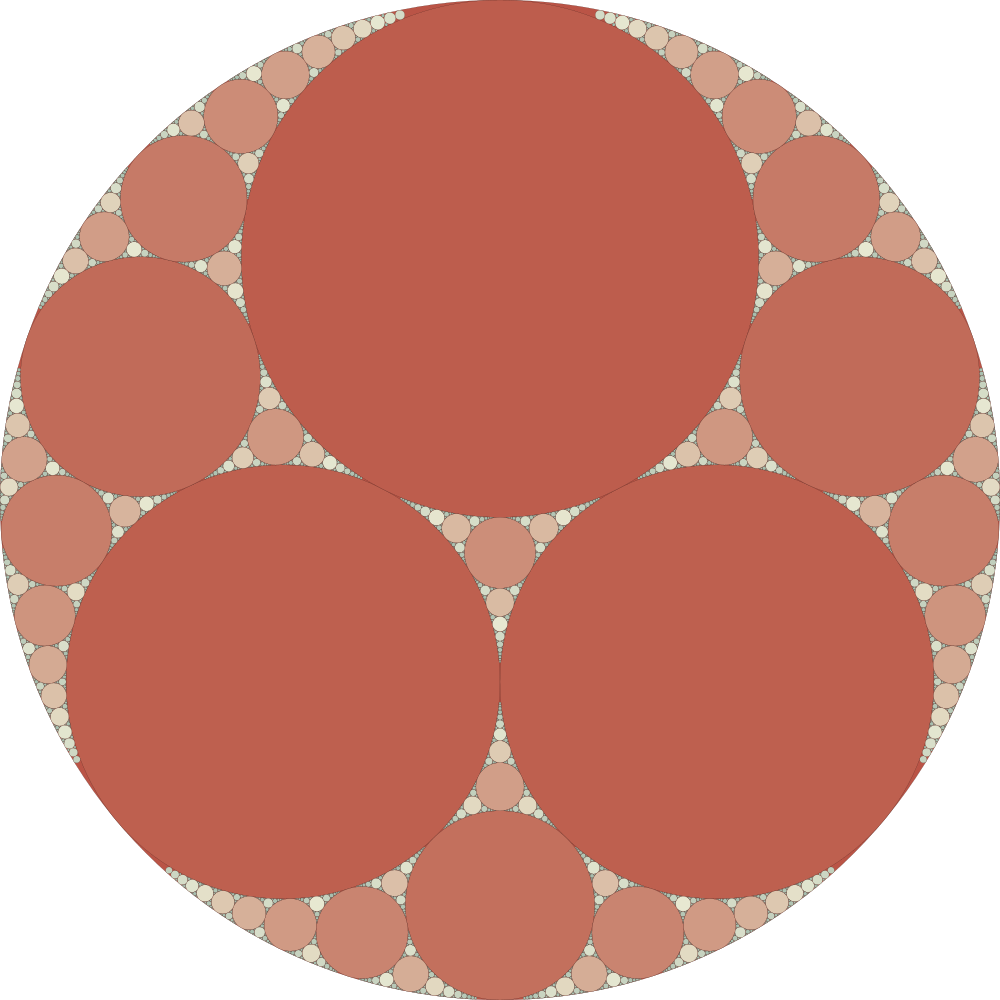

In [132]:
# Create SVG canvas
canvas = svg.SVG(
    width=pix,
    height=pix,
    elements=elements
)

# Save SVG to file
with open('gasket.svg', 'w') as f:
    f.write(str(canvas))
    
# render svg
display(SVG(str(canvas)))

(256, 3)
(512, 3)


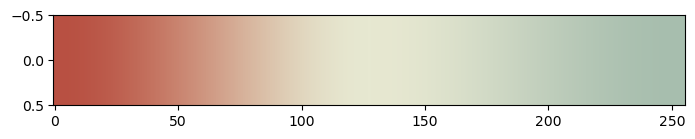

In [137]:
import colour
import numpy as np

theme_colors = ['#B85042', '#E7E8D1', '#A7BEAE']
n_theme = len(theme_colors)
CAM16UCS = colour.convert(theme_colors, 'Hexadecimal', 'CAM16UCS')


for i in range(n_theme-1):
    gradient = colour.algebra.lerp(
        colour.algebra.smooth(np.linspace(0, 1, 256),0,1,clip=True)[..., np.newaxis],
        CAM16UCS[i][np.newaxis],
        CAM16UCS[i+1][np.newaxis],
    )

    RGB0 = colour.convert(gradient, 'CAM16UCS', 'Output-Referred RGB')
    if i == 0:
        RGB = RGB0
    else:
        RGB = np.vstack([RGB, RGB0])
    print(RGB.shape)
    
    
# CAM16UCS = colour.convert(['#ff0000', '#00ff00'], 'Hexadecimal', 'CAM16UCS')
# gradient = colour.algebra.lerp(
#     np.linspace(0, 1, 256)[..., np.newaxis],
#     CAM16UCS[0][np.newaxis],
#     CAM16UCS[1][np.newaxis],
# )
# RGB = colour.convert(gradient, 'CAM16UCS', 'Output-Referred RGB')

#colour.plotting.plot_multi_colour_swatches(np.clip(RGB, 0, 1))

#print(RGB)
#print(colour.convert(RGB, 'Output-Referred RGB', 'Hexadecimal'))

# make a colormap from RGB
from matplotlib.colors import ListedColormap
cmap = ListedColormap(np.clip(RGB, 0, 1))
plt.figure(figsize=(8, 1))
gradient = np.linspace(0, 1, 256)
plt.imshow([gradient], aspect='auto', cmap=cmap)
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.99)
plt.show()



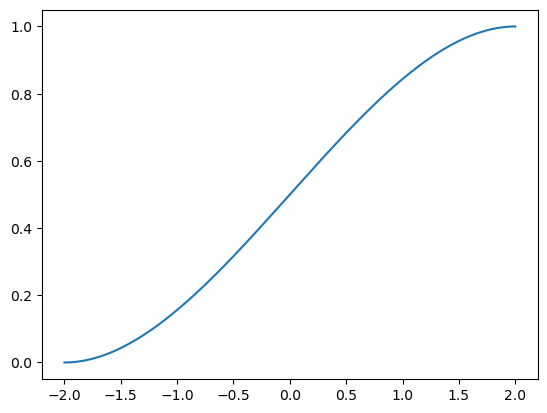

In [136]:
x = np.linspace(-2, 2, 500)

y = colour.algebra.smoothstep_function(x, -2, 2, clip=True)

plt.figure()
plt.plot(x, y)
plt.show()
